# **PROBLEM STATEMENT**
- Loan defaults are a growing challenge for financial institutions, leading to significant losses and inefficiencies. Traditional loan approval processes often fail to accurately assess borrower risks, contributing to high default rates. There is a need for an advanced predictive model that can leverage borrower data to improve decision-making and minimize financial risks
---
**OBJECTIVE**

- The objective of this project is to develop a machine learning model that predicts loan approvals based on borrower attributes such as income, credit history, and employment experience. This model aims to assist financial institutions in reducing default risks, improving decision-making efficiency, and ensuring fair lending practices.
---
**Difference btw PS and Objective.**


- The problem statement defines the why (the problem or challenge), while the objective defines the what (the solution or outcome).
---
**Problem Statement with Objectives**

- Loan defaults pose a significant challenge for financial institutions, leading to financial losses and inefficiencies in the approval process. This project aims to address these challenges by leveraging machine learning techniques to predict loan approvals, thereby reducing risks and improving decision-making

In [37]:
# importing the libraries

import pandas as pd
import seaborn as sns
import numpy as np

# For visualisation

import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
# loading the CSV file

df = pd.read_csv("loan_data (1).csv")
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [39]:
df.shape

(45000, 14)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [41]:
df.isnull().sum()

,0
person_age,0
person_gender,0
person_education,0
person_income,0
person_emp_exp,0
person_home_ownership,0
loan_amnt,0
loan_intent,0
loan_int_rate,0
loan_percent_income,0


In [42]:
df.duplicated().sum()

0

In [43]:
df['loan_status'].value_counts()

,count
loan_status,
0,35000
1,10000


In [44]:
df['person_education'].value_counts()

,count
person_education,
Bachelor,13399
Associate,12028
High School,11972
Master,6980
Doctorate,621


In [45]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['person_gender'] = le.fit_transform(df['person_gender'])
df['person_home_ownership'] = le.fit_transform(df['person_home_ownership'])
df['loan_intent'] = le.fit_transform(df['loan_intent'])
df['previous_loan_defaults_on_file'] = le.fit_transform(df['previous_loan_defaults_on_file'])

In [46]:
education_mapping = {'High School': 0,
                     'Associate': 1,
                     'Bachelor': 2,
                     'Master': 3,
                     'Doctorate': 4}

df['person_education'] = df['person_education'].map(education_mapping)

In [47]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,0,3,71948.0,0,3,35000.0,4,16.02,0.49,3.0,561,0,1
1,21.0,0,0,12282.0,0,2,1000.0,1,11.14,0.08,2.0,504,1,0
2,25.0,0,0,12438.0,3,0,5500.0,3,12.87,0.44,3.0,635,0,1
3,23.0,0,2,79753.0,0,3,35000.0,3,15.23,0.44,2.0,675,0,1
4,24.0,1,3,66135.0,1,3,35000.0,3,14.27,0.53,4.0,586,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,1,47971.0,6,3,15000.0,3,15.66,0.31,3.0,645,0,1
44996,37.0,0,1,65800.0,17,3,9000.0,2,14.07,0.14,11.0,621,0,1
44997,33.0,1,1,56942.0,7,3,2771.0,0,10.02,0.05,10.0,668,0,1
44998,29.0,1,2,33164.0,4,3,12000.0,1,13.23,0.36,6.0,604,0,1


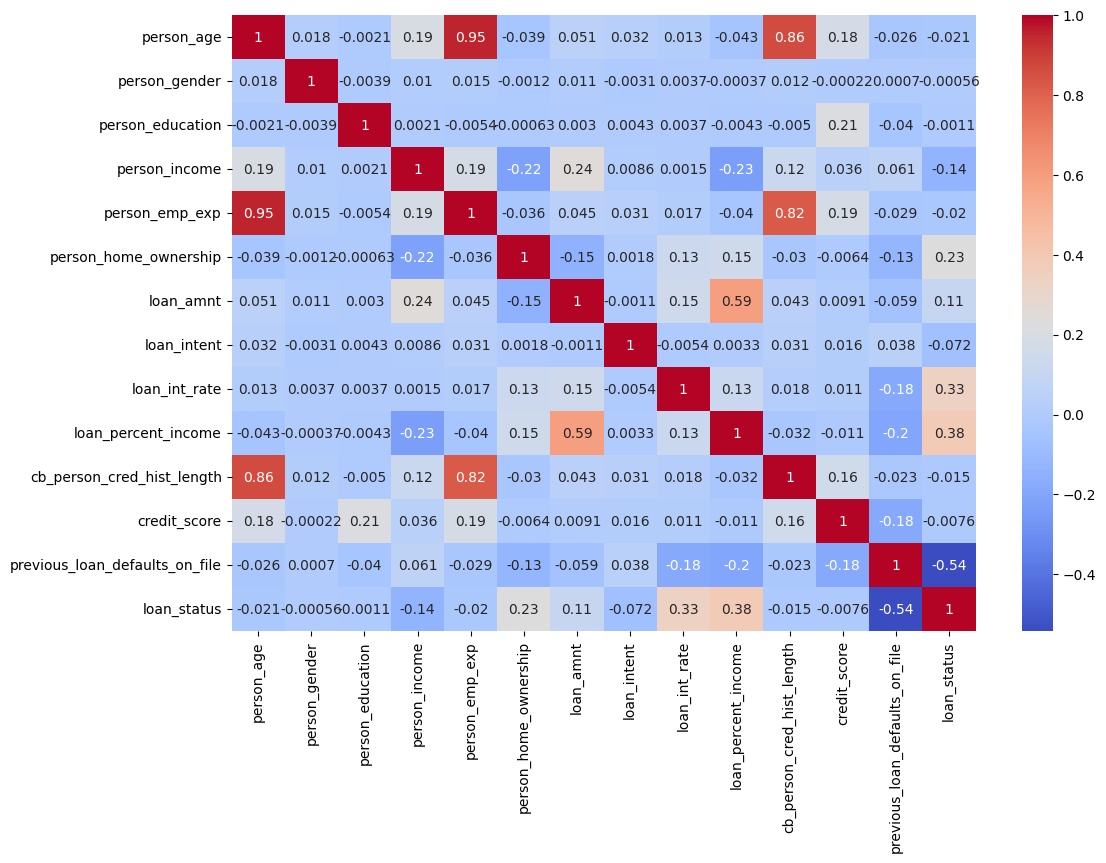

In [48]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()

In [49]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

X = df.drop(columns=['loan_status']) # Features
y = df['loan_status'] # Target

# Create an oversamppler object ( choose either RandomOverSampler or SMOTE )

# ros = RandomOverSampler() # For Random over sampling
ros = SMOTE() # For synthetic Minority Oversampling

# Apply the oversampler to the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Concatenate the two X_resampled and y_resampled
df = pd.concat([X_resampled, y_resampled], axis=1)

In [50]:
df['loan_status'].value_counts()

,count
loan_status,
1,35000
0,35000


In [51]:
df.drop(columns=['person_age','person_gender','person_education','person_emp_exp','loan_intent','cb_person_cred_hist_length','credit_score'], inplace=True)

In [52]:
df

,person_income,person_home_ownership,loan_amnt,loan_int_rate,loan_percent_income,previous_loan_defaults_on_file,loan_status
0,71948.000000,3,35000.000000,16.020000,0.490000,0,1
1,12282.000000,2,1000.000000,11.140000,0.080000,1,0
2,12438.000000,0,5500.000000,12.870000,0.440000,0,1
3,79753.000000,3,35000.000000,15.230000,0.440000,0,1
4,66135.000000,3,35000.000000,14.270000,0.530000,0,1
...,...,...,...,...,...,...,...
69995,36073.300903,3,11000.000000,12.793828,0.303143,0,1
69996,58124.203943,3,10000.000000,16.532209,0.170000,0,1
69997,87608.152290,2,17662.103118,16.915958,0.200000,0,1
69998,33693.209827,2,6000.000000,11.212417,0.180000,0,1


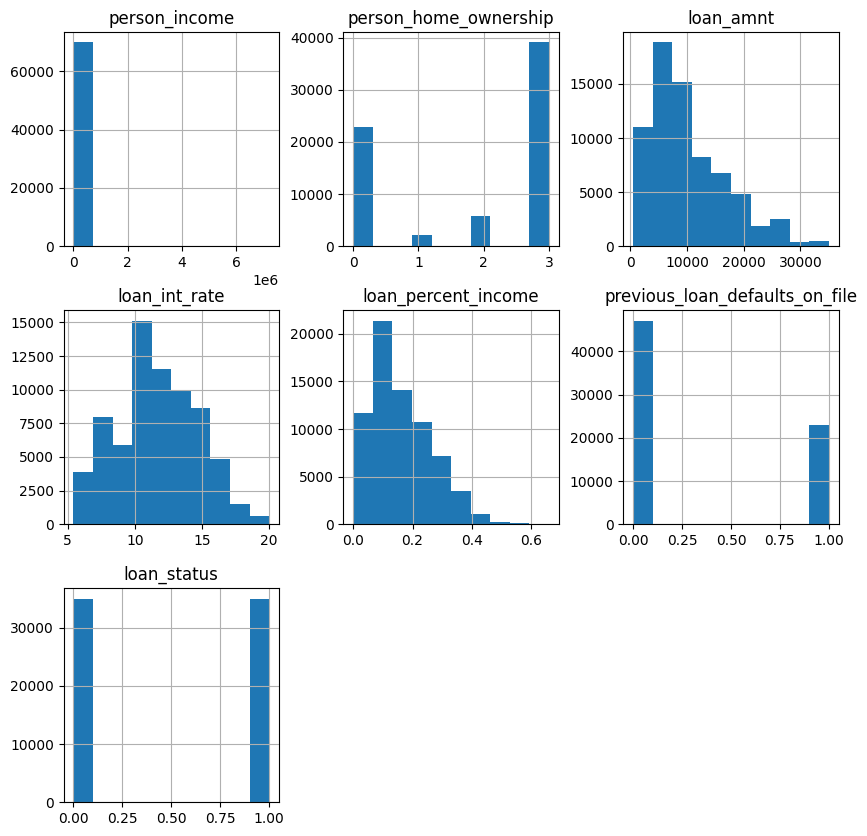

In [53]:
df.hist(figsize=(10,10))
plt.show()

In [54]:
df['loan_amnt'] = np.log1p(df['loan_amnt'])
df['loan_int_rate'] = np.log1p(df['loan_int_rate'])
df['loan_percent_income'] = np.log1p(df['loan_percent_income'])

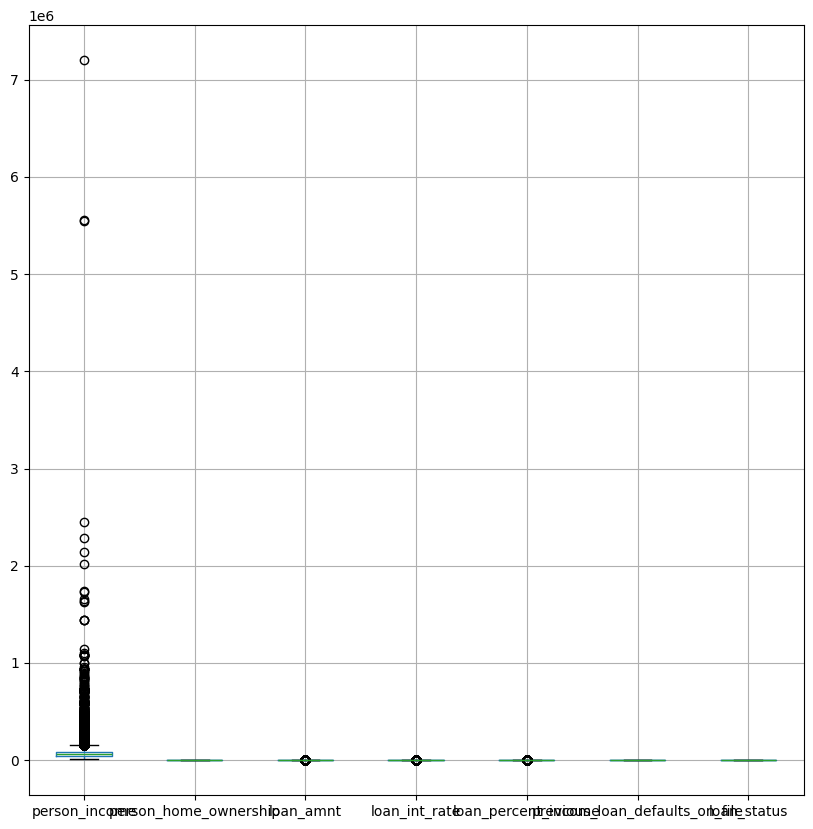

In [55]:
df.boxplot(figsize=(10,10))
plt.show()

In [56]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
numeric_cols.remove('loan_status')

for col in numeric_cols:
    df = remove_outliers_iqr(df, col)

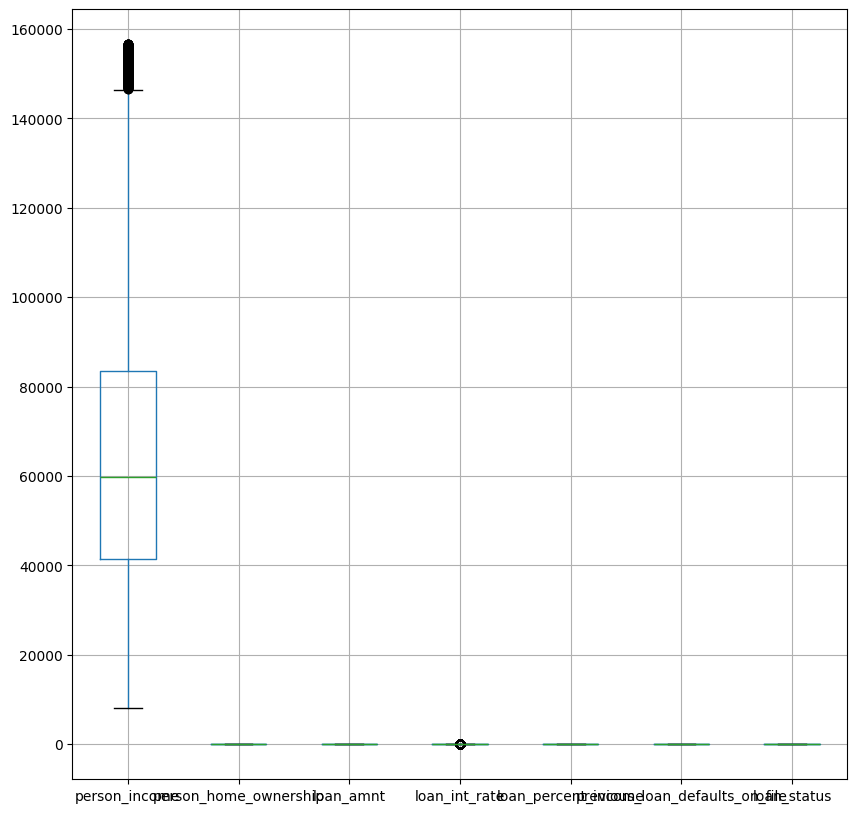

In [57]:
df.boxplot(figsize=(10,10))
plt.show()

In [58]:
from sklearn.model_selection import train_test_split
X = df[['person_income','person_home_ownership','loan_amnt','loan_int_rate','loan_percent_income','previous_loan_defaults_on_file']]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [59]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [60]:
y_pred = model.predict(X_test)

In [61]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
# precision = precision_score(y_test, y_pred)
# print("Precision:", precision)
# recall = recall_score(y_test, y_pred)
# print("Recall:", recall)
# f1 = f1_score(y_test, y_pred)
# print("F1-score:", f1)
print(classification_report(y_test, y_pred))

Accuracy: 0.8516311359587148
              precision    recall  f1-score   support

           0       0.97      0.71      0.82      7755
           1       0.79      0.98      0.87      8522

    accuracy                           0.85     16277
   macro avg       0.88      0.85      0.85     16277
weighted avg       0.87      0.85      0.85     16277



In [62]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.934447379738281
              precision    recall  f1-score   support

           0       0.95      0.91      0.93      7755
           1       0.92      0.95      0.94      8522

    accuracy                           0.93     16277
   macro avg       0.94      0.93      0.93     16277
weighted avg       0.93      0.93      0.93     16277

